In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Plot의 옵션

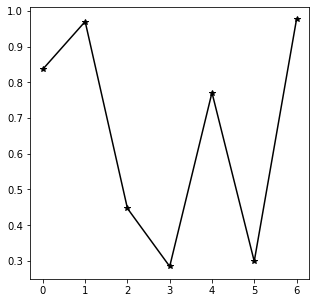

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

np.random.seed(97)
x = np.arange(7)
y = np.random.rand(7)

ax.plot(x, y,
        color='black',  # 선의 색 지정
        marker='*',     # 데이터 위치에 마커를 지정
        linestyle='solid',  # 선의 종류 지정
       )

plt.show()

## 실습용 데이터셋
- 미국 주식 데이터
- 구글과 애플 데이터 추출

In [13]:
stock = pd.read_csv('../../../data/prices.csv')
stock.sample(5)

,date,symbol,open,close,low,high,volume
85603,2010-09-23,CBG,17.910000,17.740000,17.709999,18.200001,2578000.0
352207,2012-12-24,IP,39.210003,39.470002,39.000004,39.759997,1346000.0
671167,2015-07-29,AMT,95.660004,96.320000,93.769997,97.470001,3657700.0
720692,2015-12-17,MCHP,47.549999,46.439999,46.439999,47.900002,2358100.0
10088,2010-02-03,ADP,40.860002,40.800003,40.510004,41.020000,3141700.0


In [14]:
# date를 인덱스로 바꿈
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d', errors='raise')
stock.set_index("date", inplace = True)
stock.sample(5)

,symbol,open,close,low,high,volume
date,,,,,,
2014-06-16,DLR,57.279999,57.610001,57.279999,58.169998,1006300.0
2012-06-25,PCLN,662.190002,651.650024,647.500000,663.739990,663600.0
2011-11-30,HAR,39.980000,41.299999,39.430000,41.549999,952200.0
2010-06-16,ALK,51.500000,52.799999,50.459999,53.189999,3702000.0
2010-05-20,MMM,81.169998,79.580002,79.500000,81.470001,8752700.0


In [9]:
# 애플과 구글의 주식만 추출
# FAANG
apple = stock[stock['symbol']=='AAPL']
google = stock[stock['symbol']=='GOOGL']
google.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


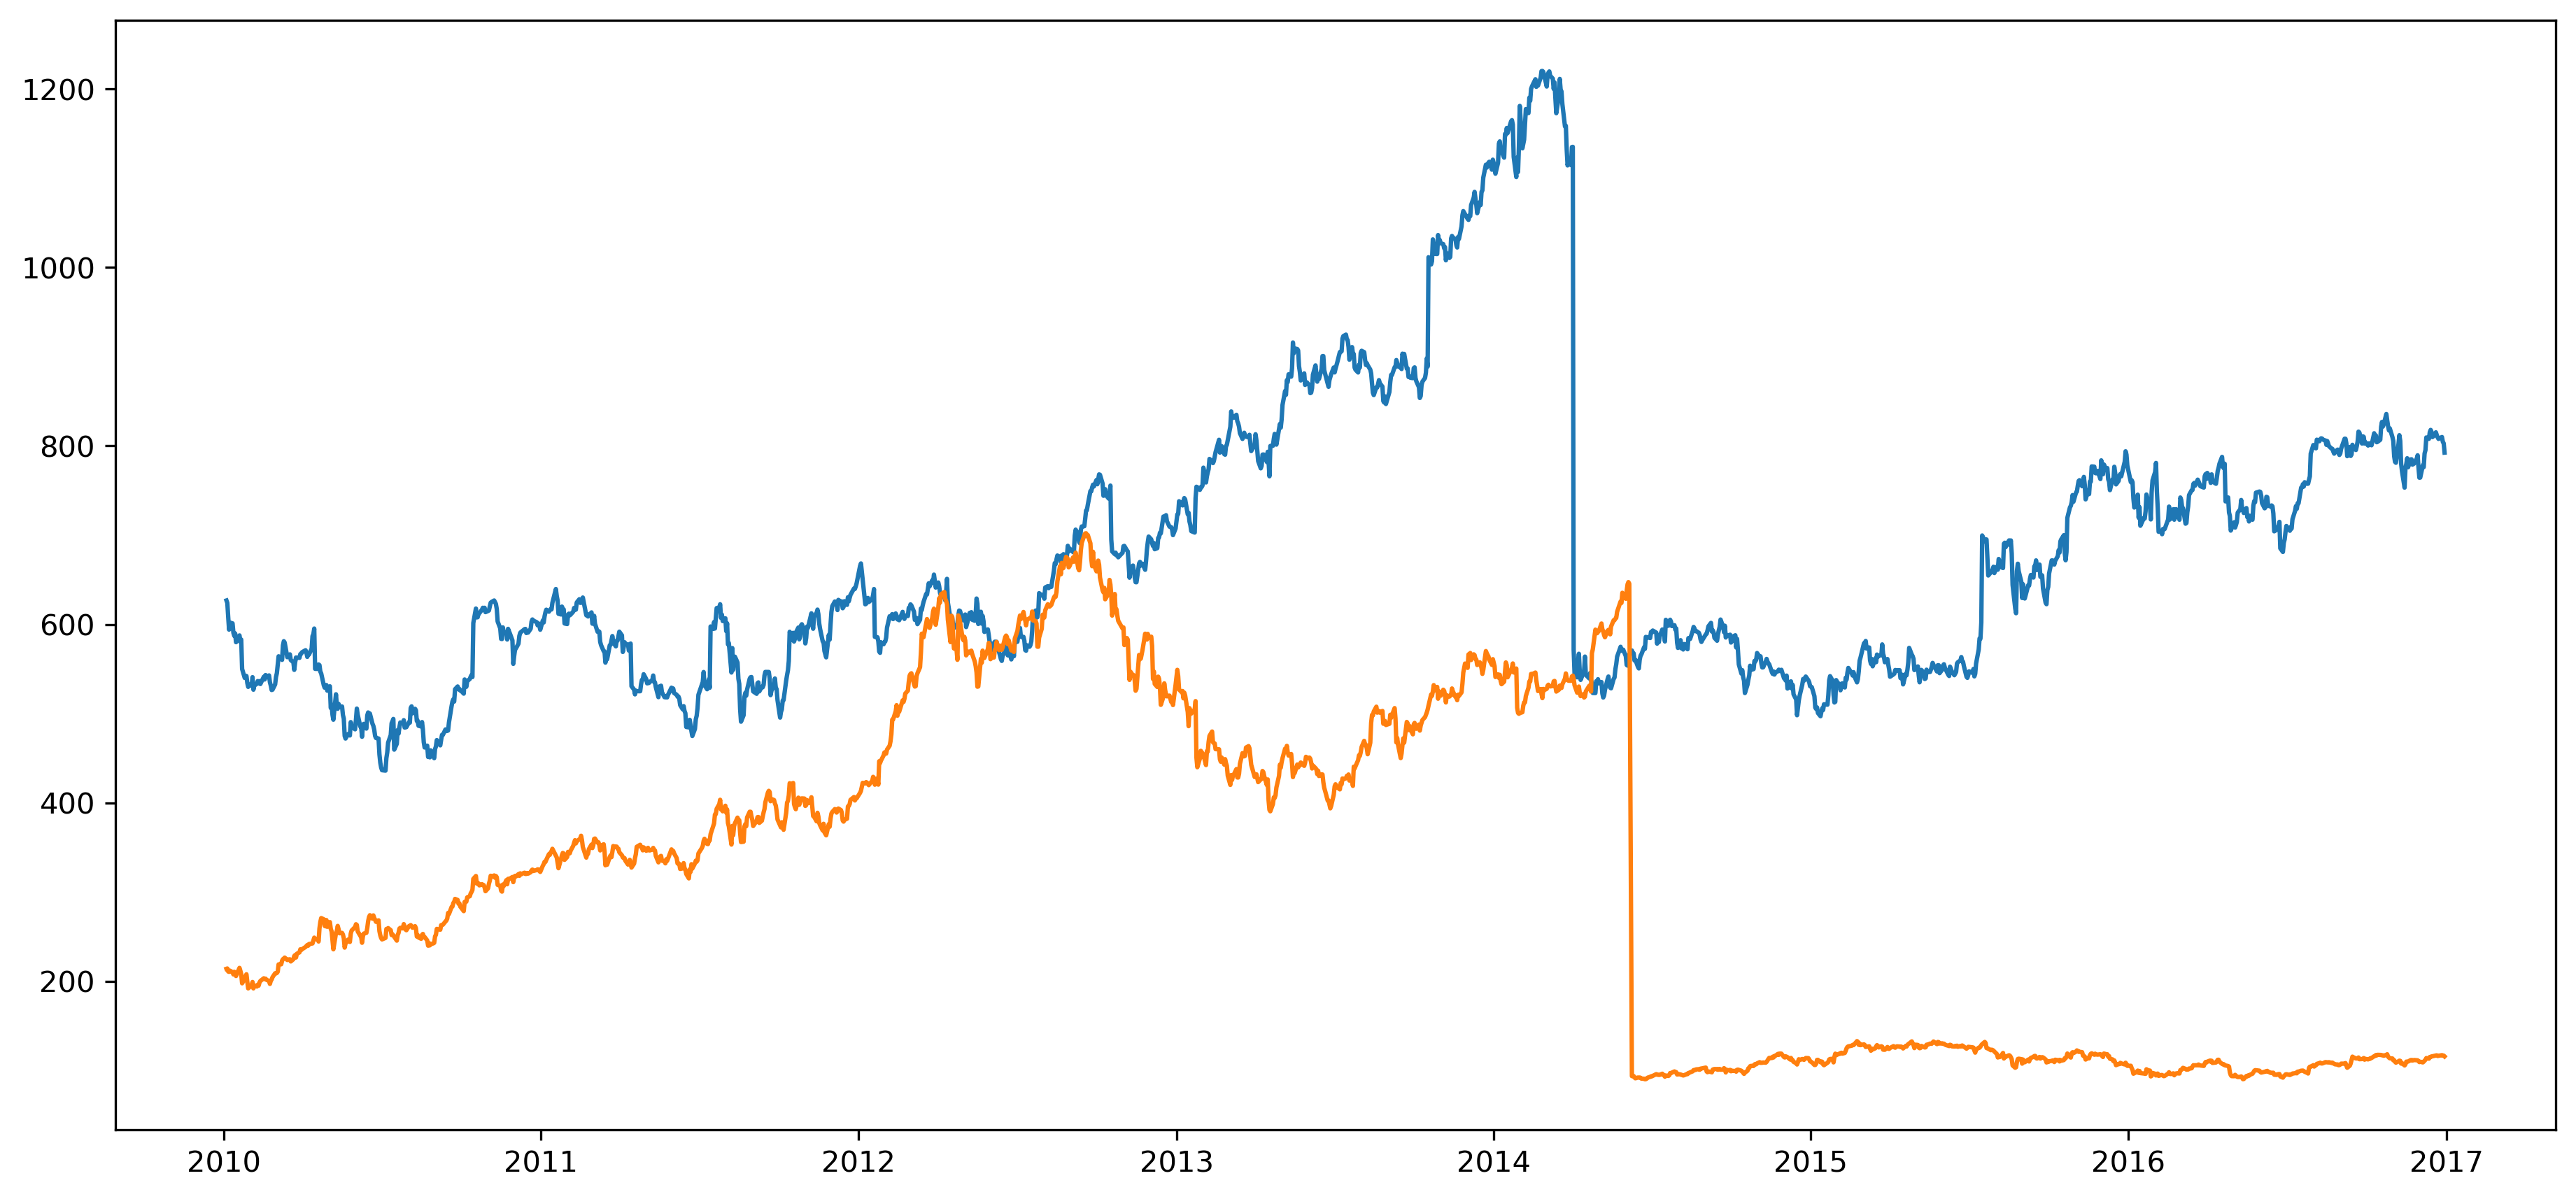

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=300)

ax.plot(google.index, google['close'])
ax.plot(apple.index, apple['close'])

plt.show()

### 이동 평균 사용
- 노이즈를 많이 줄인 것을 볼 수 있음

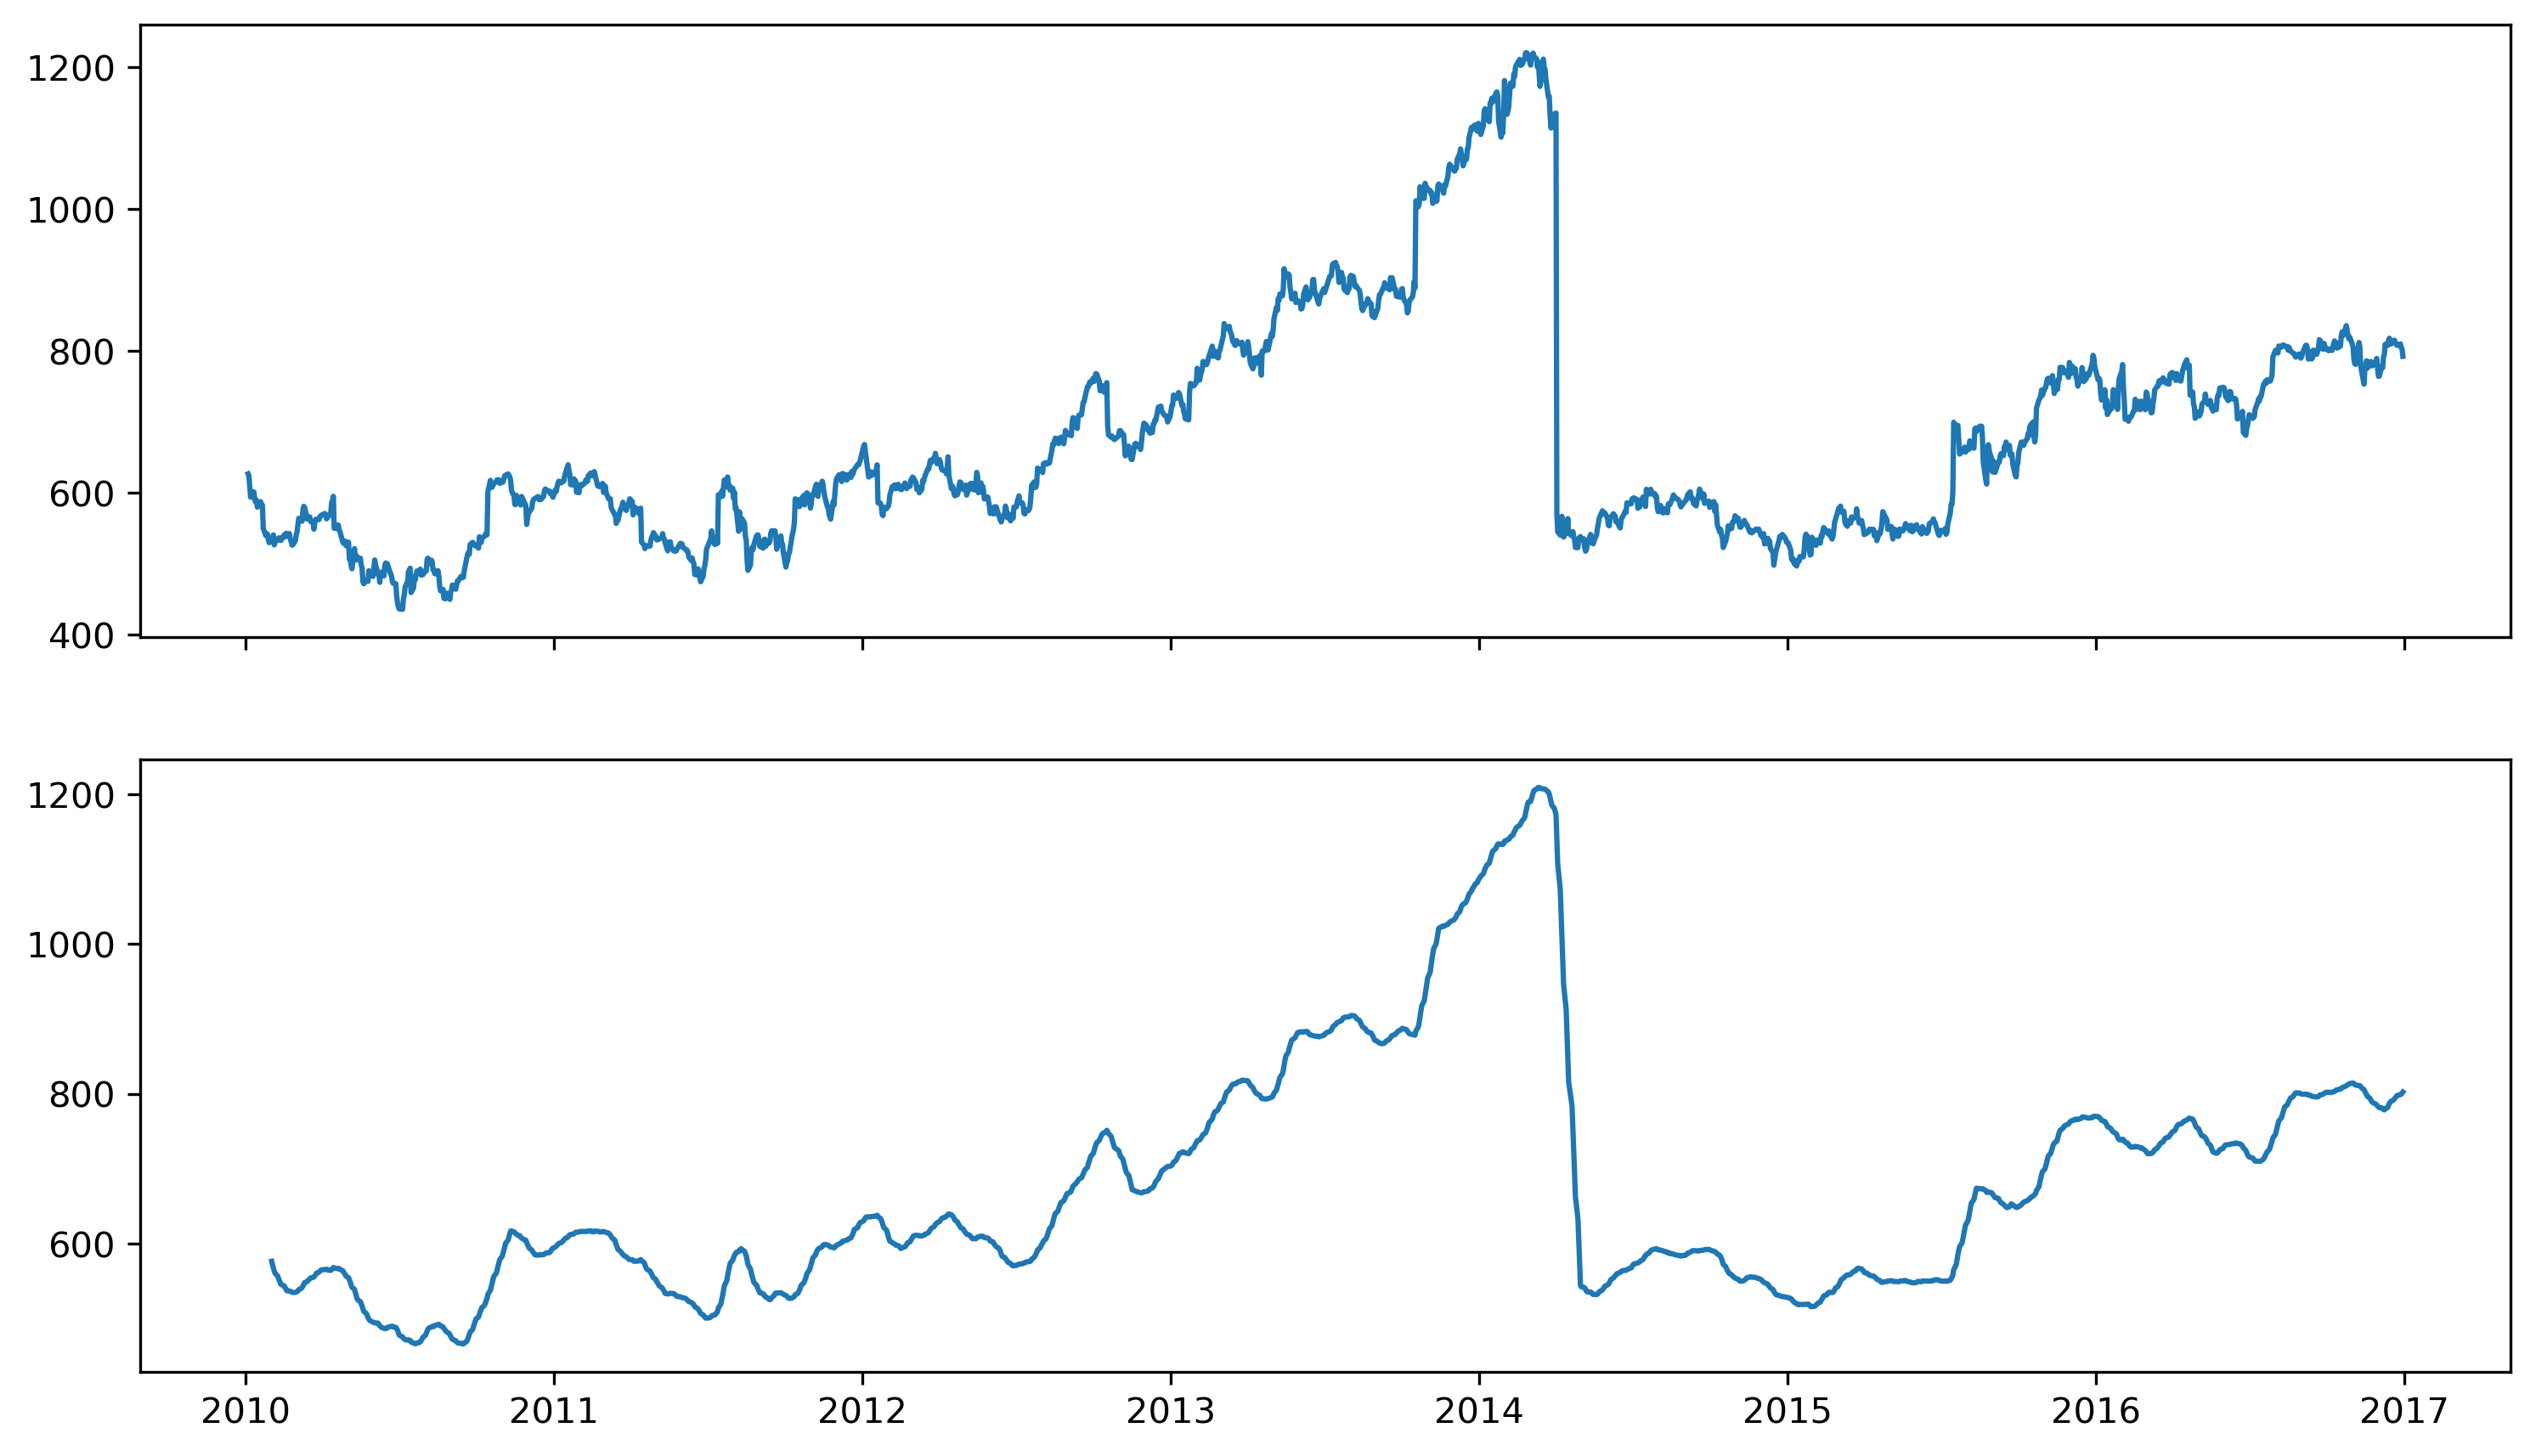

In [11]:
google_rolling = google.rolling(window=20).mean()

fig, axes = plt.subplots(2, 1, figsize=(12, 7), dpi=300, sharex=True)

# 원본과 이동평균 그래프를 비교함
axes[0].plot(google.index,google['close'])
axes[1].plot(google_rolling.index,google_rolling['close'])

plt.show()

## 추세에 집중
- MultipleLocator()

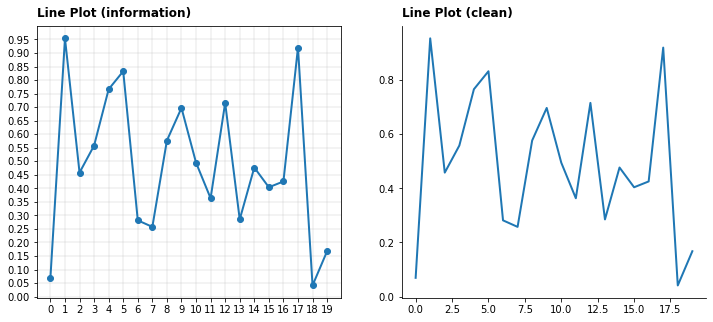

In [15]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(12, 5))


np.random.seed(970725)

x = np.arange(20)
y = np.random.rand(20)


# Ax1
ax1 = fig.add_subplot(121)
ax1.plot(x, y,
         marker='o',
         linewidth=2)

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))    
ax1.grid(linewidth=0.3)    


# Ax2
ax2 = fig.add_subplot(122)
ax2.plot(x, y,
       linewidth=2,)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)




ax1.set_title(f"Line Plot (information)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')
ax2.set_title(f"Line Plot (clean)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')


plt.show()

### 보간
- smoothing 해주자

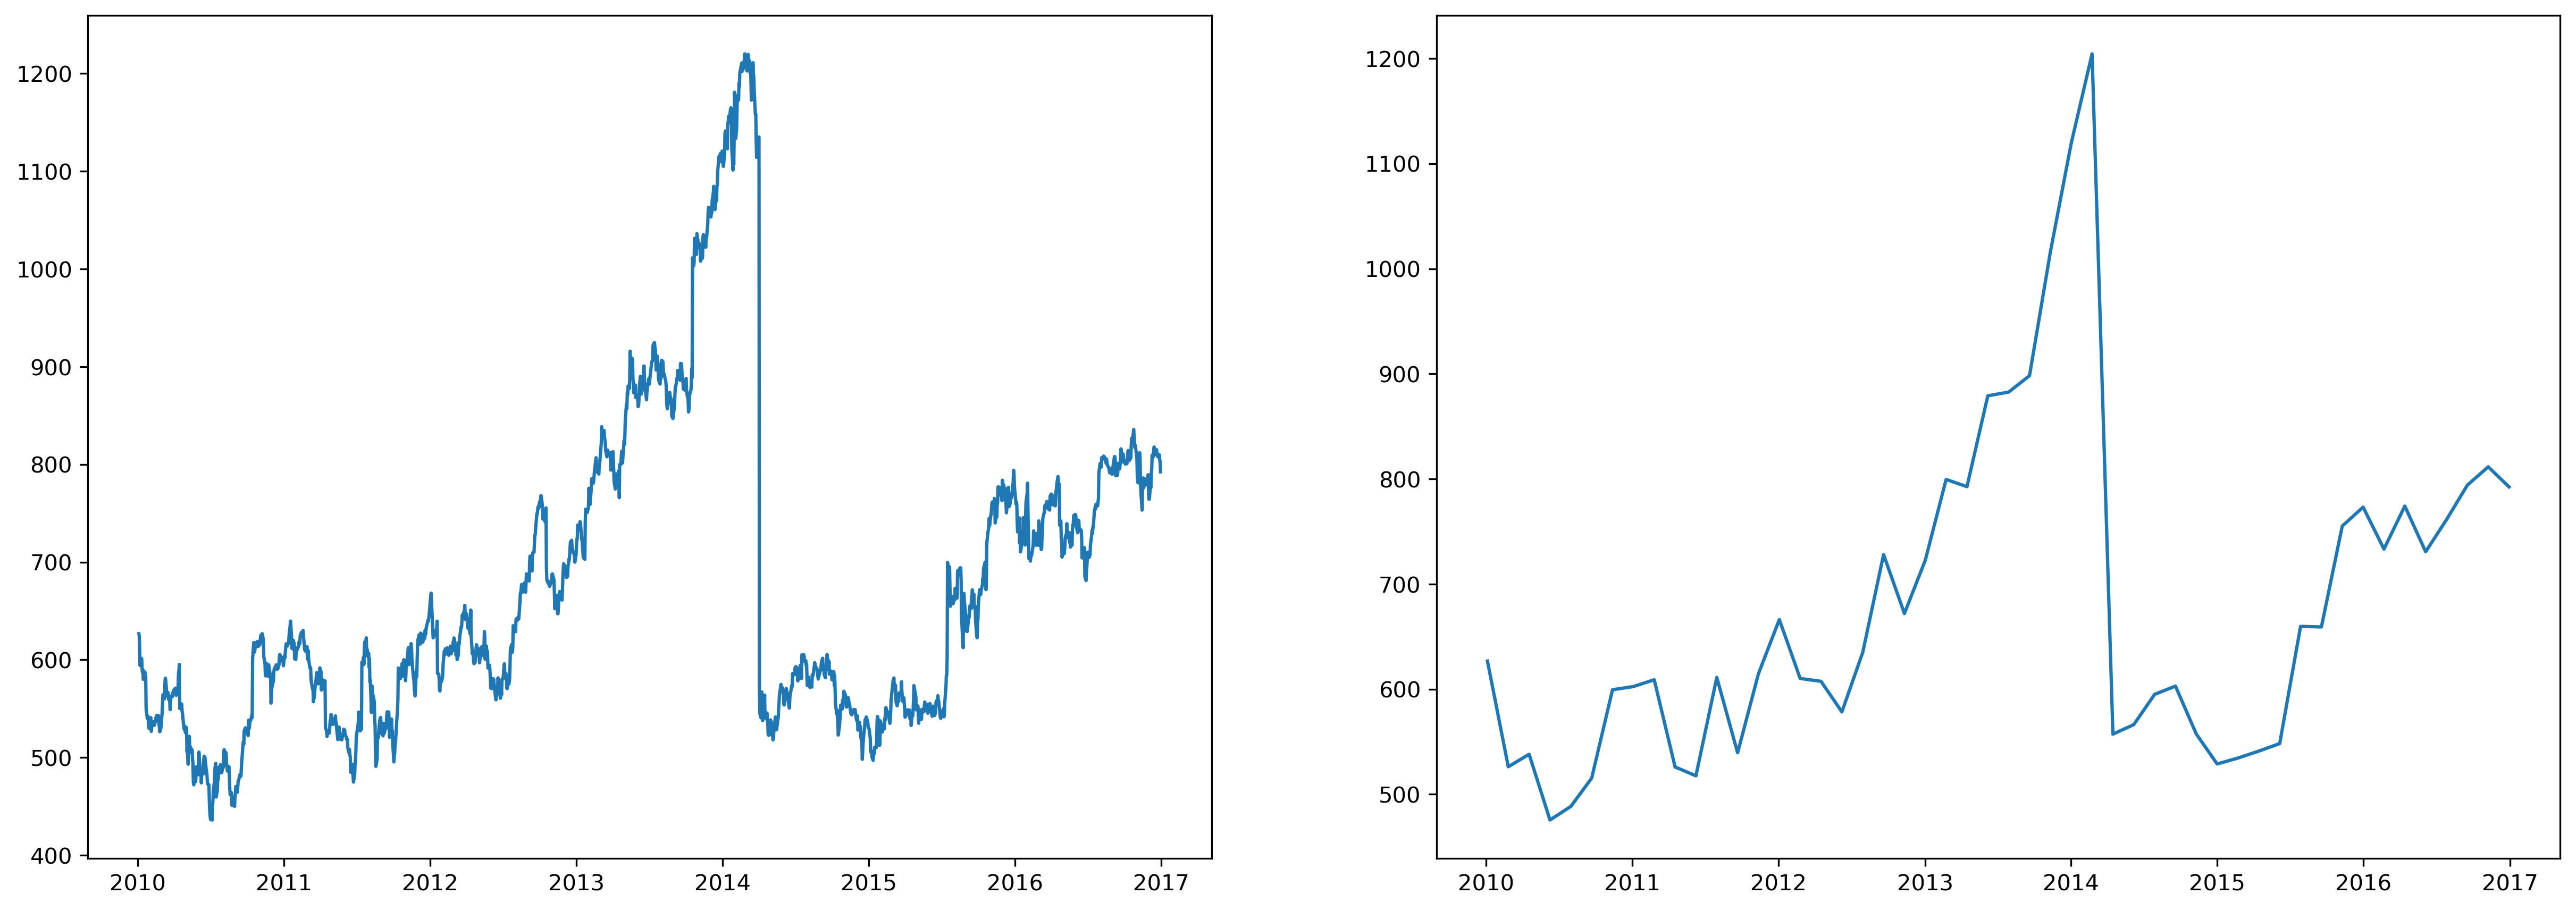

In [16]:
from scipy.interpolate import make_interp_spline, interp1d
import matplotlib.dates as dates

fig, ax = plt.subplots(1, 2, figsize=(20, 7), dpi=300)

date_np = google.index
value_np = google['close']

date_num = dates.date2num(date_np)

# smooth
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 50) 
spl = make_interp_spline(date_num, value_np, k=3)
value_np_smooth = spl(date_num_smooth)

# print
ax[0].plot(date_np, value_np)
ax[1].plot(dates.num2date(date_num_smooth), value_np_smooth)

plt.show()

### 이중 축 사용
- ```twinx()``` : 다른 정보를 나타낼 때 사용
- ```secondary-xaxis()``` : 같은 정보에서 사용

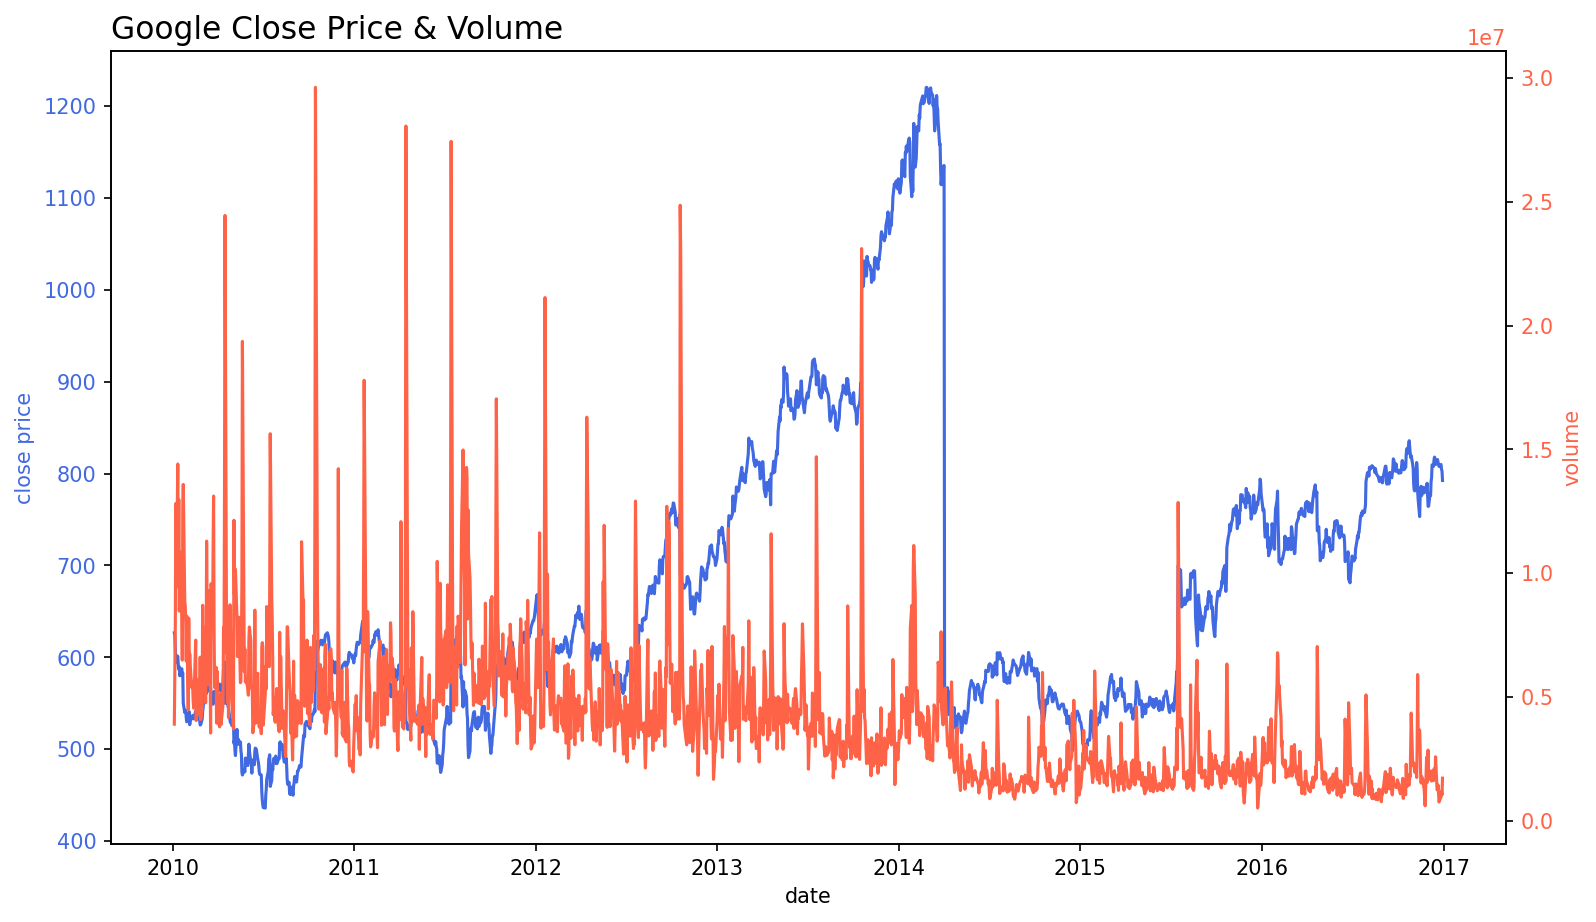

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 7), dpi=150)

# First Plot
color = 'royalblue'

ax1.plot(google.index, google['close'], color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)  
ax1.tick_params(axis='y', labelcolor=color)

# # Second Plot
ax2 = ax1.twinx()  
color = 'tomato'

ax2.plot(google.index, google['volume'], color=color)
ax2.set_ylabel('volume', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Google Close Price & Volume', loc='left', fontsize=15)
plt.show()

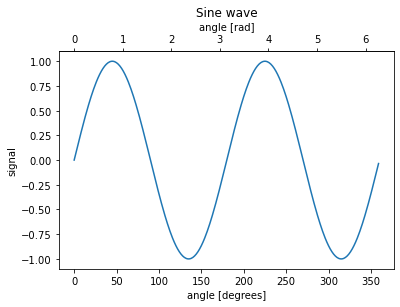

In [18]:
def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

fig, ax = plt.subplots()
x = np.arange(0, 360)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')
secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
plt.show()